# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement a SGD method that will train the Lasso regression for 10 epochs.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

In [13]:
import numpy as np
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alphas = [0.01, 0.1, 1, 10, 100] #0.1 # change here

results = []
    
# add 1-3 line of code here
for alpha in alphas:
    w = np.linalg.inv(x.T * x + alpha * I) * x.T * y
    w=w.ravel() #1D
    
    results.append(w)

# add 1-3 lines to compare the results
print("\nPorównanie wyników:")
for i, alpha in enumerate(alphas):
    print(f"Alpha: {alpha}, Współczynniki: {results[i]}")




Porównanie wyników:
Alpha: 0.01, Współczynniki: [[-167.85534019    1.54416013]]
Alpha: 0.1, Współczynniki: [[-101.72397081    1.16978757]]
Alpha: 1, Współczynniki: [[-20.59044706   0.71048616]]
Alpha: 10, Współczynniki: [[-2.29106262  0.60688107]]
Alpha: 100, Współczynniki: [[-0.22873     0.59509096]]


## 2. Implement based on the Ridge regression example, the Lasso regression.

Please implement the SGD method and compare the results with the sklearn Lasso regression results. 

In [16]:
def sgd(x, y, alpha, epochs, learning_rate):
    # your code goes here
    w = np.zeros((x.shape[1], 1))
    for epoch in range(epochs):
        for i in range(len(x)):
            xi = x[i:i+1]
            yi = y[i:i+1]

            y_pred = np.dot(xi, w)
            gradient = 2 * xi.T *(yi - y_pred) + alpha * np.sign(w)
            w = w - learning_rate * gradient
    return w
    pass

In [17]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x = np.asmatrix(np.c_[np.ones((15,1)),x_scaled])
X = np.c_[np.ones((15, 1)), x_scaled]

#I = np.identity(2)
I = np.identity(X.shape[1])
alpha = 0.1 
epochs = 10
learning_rate = 0.001


#w = np.linalg.inv(x.T*x + alpha * I)*x.T*y # update this line
#w=w.ravel()
w_sgd = sgd(X, y, alpha, epochs, learning_rate)

lasso = Lasso(alpha=alpha)
lasso.fit(X[:, 1:], y)
w_sklearn = np.append(lasso.intercept_, lasso.coef_)

# Wyniki
print(f'Wyniki z SGD:\n{w_sgd.ravel()}')
print(f'Wyniki z Lasso (sklearn):\n{w_sklearn}')


Wyniki z SGD:
[-35.73654316  -9.23750206]
Wyniki z Lasso (sklearn):
[102.46666667  26.23725365]


## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

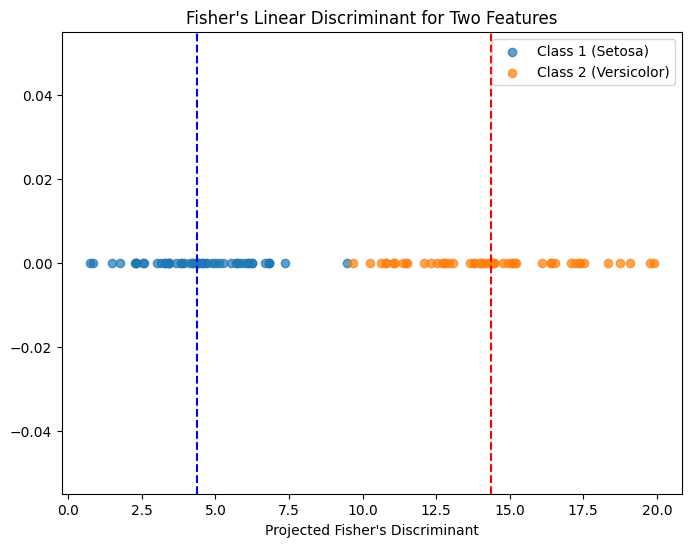

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

x1 = iris_df['sepal width (cm)'].values
x2 = iris_df['sepal length (cm)'].values
y = iris_data.target

class1 = y == 0
class2 = y == 1

X1 = np.column_stack((x1[class1], x2[class1]))
X2 = np.column_stack((x1[class2], x2[class2]))

mean1 = np.mean(X1, axis=0)
mean2 = np.mean(X2, axis=0)

S1 = np.cov(X1, rowvar=False)
S2 = np.cov(X2, rowvar=False)

Sw = S1 + S2

w = np.linalg.inv(Sw).dot(mean2 - mean1)

X1_proj = X1.dot(w)
X2_proj = X2.dot(w)

plt.figure(figsize=(8, 6))
plt.scatter(X1_proj, np.zeros_like(X1_proj), label='Class 1 (Setosa)', alpha=0.7)
plt.scatter(X2_proj, np.zeros_like(X2_proj), label='Class 2 (Versicolor)', alpha=0.7)
plt.axvline(x=np.mean(X1_proj), color='blue', linestyle='dashed')
plt.axvline(x=np.mean(X2_proj), color='red', linestyle='dashed')
plt.xlabel("Projected Fisher's Discriminant")
plt.legend()
plt.title("Fisher's Linear Discriminant for Two Features")
plt.show()
